In [101]:
import pandas as pd 

In [102]:
dfGeneral = pd.read_csv("youtoxic_english_1000.csv")
dfGeneral = dfGeneral.drop(['CommentId','VideoId'],axis=1) #Not useful for now 


# Data analysis
It is necessary to visualize and analyze the data in order to be able to choose the columns that are relevant in order to use them in the learning part of the project. 
In the next section, We will see the proportion of each classes compared to the whole dataset and decide if we are going to keep it or not.

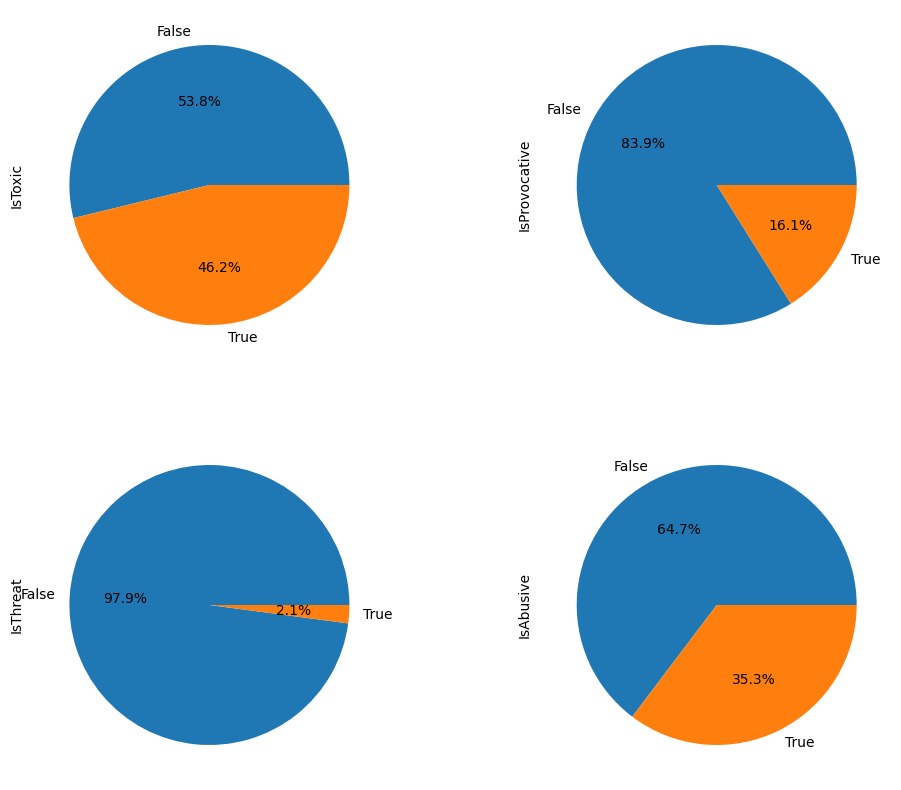

In [103]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 10))
dfGeneral["IsToxic"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0, 0]) #OK 
dfGeneral["IsProvocative"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0, 1]) # Not sure
dfGeneral["IsThreat"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1, 0]) #Delete
dfGeneral["IsAbusive"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1, 1]) #Ok

plt.show()

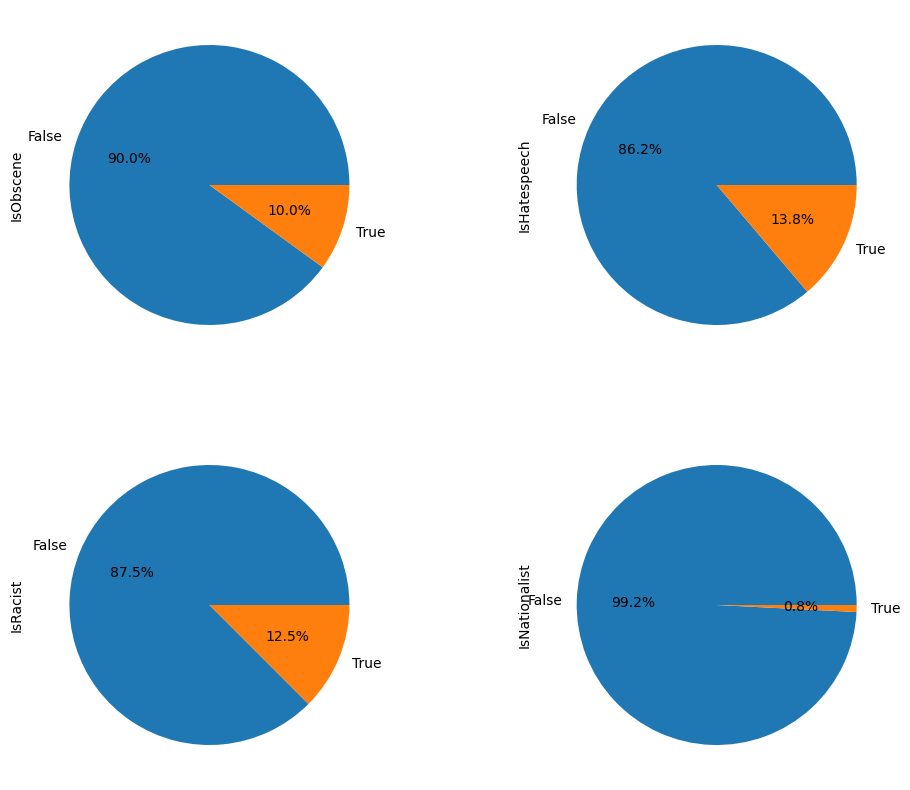

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 10))

dfGeneral["IsObscene"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0, 0]) # Not sure 
dfGeneral["IsHatespeech"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0, 1]) # Not sure
dfGeneral["IsRacist"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1, 0]) # Not sure
dfGeneral["IsNationalist"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1, 1]) #Delete

plt.show()


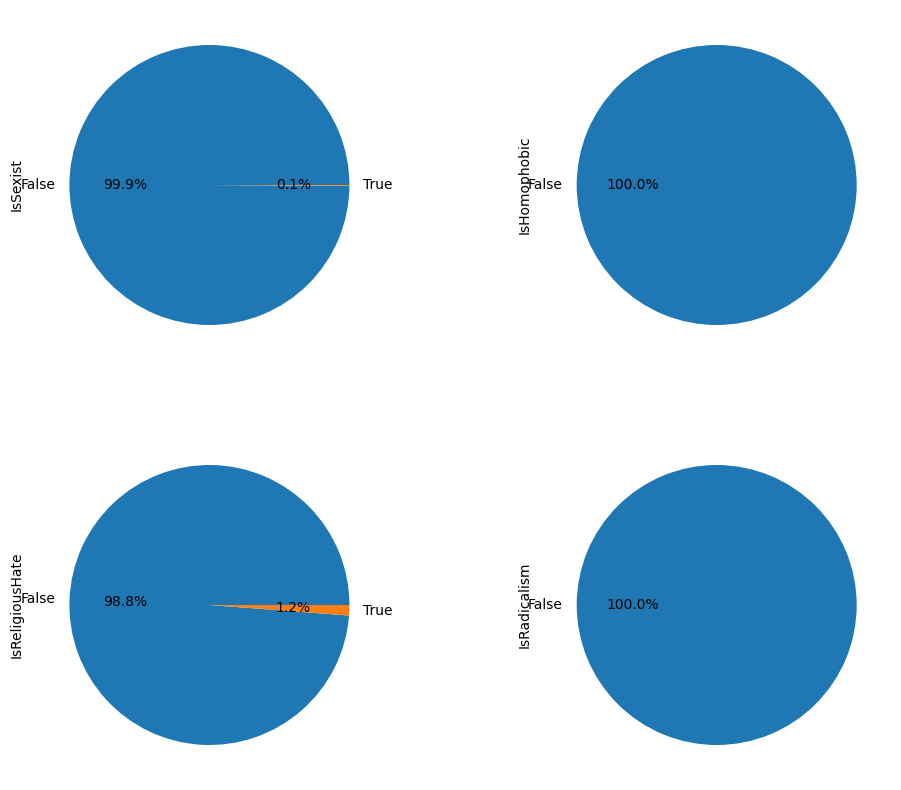

In [105]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 10))
dfGeneral["IsSexist"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0, 0]) #Delete 
dfGeneral["IsHomophobic"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0, 1]) #Delete
dfGeneral["IsReligiousHate"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1, 0]) #Delete
dfGeneral["IsRadicalism"].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1, 1]) #Delete

plt.show()


# <foo color='red'> Result </foo>
The analysis showed that there are two columns that are pertinent : "IsToxic" and "IsAbusive". We can also accept an additionnal column "IsProvocative". The other ones have shown that they lack positive instances, therefore they won't be usefull unless we change the format of the Dataset

In [106]:
dfResult = dfGeneral[['Text','IsToxic','IsAbusive','IsProvocative']].copy()
dfResult


,Text,IsToxic,IsAbusive,IsProvocative
0,If only people would just take a step back and...,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False
3,There are a very large number of people who do...,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False
...,...,...,...,...
995,I remember that they sent in the national defe...,False,False,False
996,Stats don`t represent the problem. Race baitin...,True,False,False
997,The quote from the mother... Wow that hit hard...,False,False,False
998,this video is so racist,False,False,False


<h1 style='color:red'> Another format </h1>

<p style='font-size:20px'>We can explote the columns  the ones that were kept to create the unique column: "Negative" which will be assigned True if there is a True in atleast one of the 3 columns, and No otherwise.</p>

In [107]:
import numpy as np
dfHate_Speech = dfGeneral[['Text','IsToxic','IsAbusive','IsProvocative']].copy()
dfHate_SpeechWT = dfHate_Speech.drop('Text',axis=1)
dfHate_Speech['Negative?'] = dfHate_SpeechWT.any(axis=1)


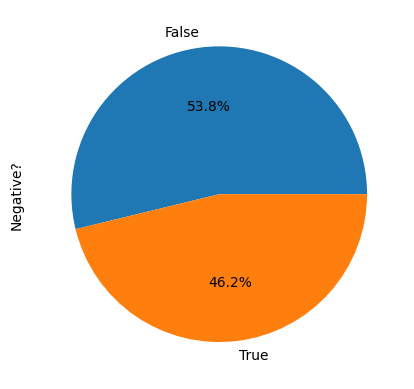

In [108]:
dfHate_Speech['Negative?'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.show()

In [109]:
dfTweets = pd.read_csv("labeled_data.csv")

dfTweets = dfTweets.drop(["Unnamed: 0"],axis = 1)
dfTweets['class'] =   dfTweets['class'].map(lambda x:  True if x==0 or x==1 else False)
dfTweets= dfTweets.drop(["hate_speech","offensive_language","neither","count"],axis = 1)

In [110]:
dfTweets.rename(columns={"class":"Negative?"})

,Negative?,tweet
0,False,!!! RT @mayasolovely: As a woman you shouldn't...
1,True,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,True,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,True,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,True,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,True,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,False,"you've gone and broke the wrong heart baby, an..."
24780,True,young buck wanna eat!!.. dat nigguh like I ain...
24781,True,youu got wild bitches tellin you lies


In [111]:
dfHate_Speech = dfHate_Speech.drop(["IsToxic","IsAbusive","IsProvocative"],axis=1)
dfHate_Speech



,Text,Negative?
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False
...,...,...
995,I remember that they sent in the national defe...,False
996,Stats don`t represent the problem. Race baitin...,True
997,The quote from the mother... Wow that hit hard...,False
998,this video is so racist,False


In [112]:
dfTweets["Negative?"] = dfTweets["class"].copy()
dfTweets = dfTweets.drop(["class"],axis=1)



In [113]:
dfTweets = dfTweets.rename(columns={'tweet':'Text'})
dfTweets


,Text,Negative?
0,!!! RT @mayasolovely: As a woman you shouldn't...,False
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,True
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,True
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,True
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,True
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,True
24779,"you've gone and broke the wrong heart baby, an...",False
24780,young buck wanna eat!!.. dat nigguh like I ain...,True
24781,youu got wild bitches tellin you lies,True


In [114]:
dfTotal = pd.concat([dfHate_Speech,dfTweets]) 
dfTotal

,Text,Negative?
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,True
24779,"you've gone and broke the wrong heart baby, an...",False
24780,young buck wanna eat!!.. dat nigguh like I ain...,True
24781,youu got wild bitches tellin you lies,True


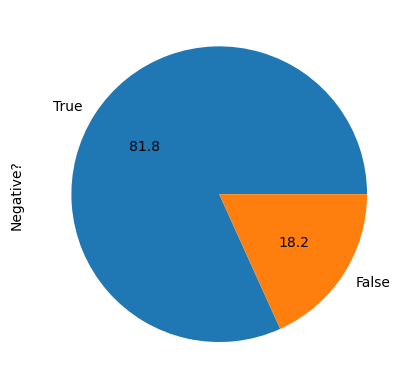

In [115]:
dfTotal["Negative?"].value_counts().plot(kind="pie",autopct='%.1f')
plt.show()

In [116]:


df = pd.read_csv("processedNeutral.csv")
df = df.transpose()
df = df.reset_index()
df.columns = (['Text'])
df['Negative?'] = False
df

,Text,Negative?
0,Pak PM survives removal scare,False
1,but court orders further probe into corruptio...,False
2,Supreme Court quashes criminal complaint again...,False
3,Art of Living's fights back over Yamuna floodp...,False
4,livid.,False
...,...,...
1565,IDFC official Vikram Limaye,False
1566,former captain Diana Edulji are others in pan...,False
1567,Supreme Court names former CAG as head of 4-me...,False
1568,Court summons CM suspended BJP MP as accused i...,False


In [117]:

df2 = pd.read_csv("processedPositive.csv")
df2 = df2.transpose()
df2 = df2.reset_index()
df2.columns = (['Text'])
df2['Negative?'] = False


In [118]:
temporarydf = pd.concat([df,df2])
temporarydf

,Text,Negative?
0,Pak PM survives removal scare,False
1,but court orders further probe into corruptio...,False
2,Supreme Court quashes criminal complaint again...,False
3,Art of Living's fights back over Yamuna floodp...,False
4,livid.,False
...,...,...
1181,Thanks for the recent follow Happy to connect ...,False
1182,- top engaged members this week happy,False
1183,ngam to weeks left for cadet pilot exam cryin...,False
1184,Great! You're welcome Josh happy ^Adam,False


In [119]:
dfTemp = pd.concat([temporarydf,dfTotal])
dfTemp

,Text,Negative?
0,Pak PM survives removal scare,False
1,but court orders further probe into corruptio...,False
2,Supreme Court quashes criminal complaint again...,False
3,Art of Living's fights back over Yamuna floodp...,False
4,livid.,False
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,True
24779,"you've gone and broke the wrong heart baby, an...",False
24780,young buck wanna eat!!.. dat nigguh like I ain...,True
24781,youu got wild bitches tellin you lies,True


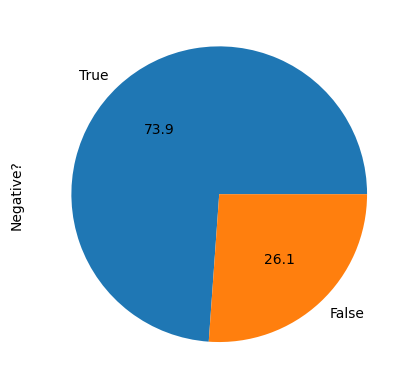

In [120]:
dfTemp['Negative?'].value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

In [121]:
rows_to_delete = dfTemp[dfTemp['Negative?'] == True].index[:15000]
dfTemp = dfTemp.drop(index=rows_to_delete)
dfTemp = dfTemp.reset_index()


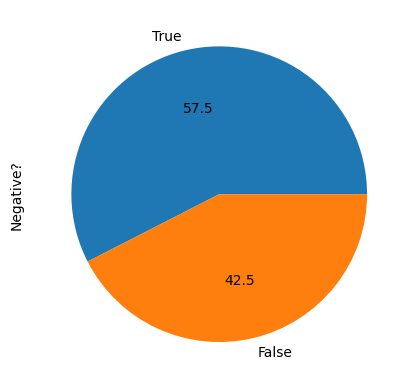

In [122]:
dfTemp['Negative?'].value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

In [123]:
dfTemp

,index,Text,Negative?
0,0,Pak PM survives removal scare,False
1,40,3 queens take centrestage.,False
2,75,Top law advisor backs use of human shield,False
3,118,What Calcutta is doing to get mom to accept he...,False
4,119,To stress dress code,False
...,...,...,...
10567,24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,True
10568,24779,"you've gone and broke the wrong heart baby, an...",False
10569,24780,young buck wanna eat!!.. dat nigguh like I ain...,True
10570,24781,youu got wild bitches tellin you lies,True
